# Demo Lines Detection with Hough Transform


(1280, 960, 3)


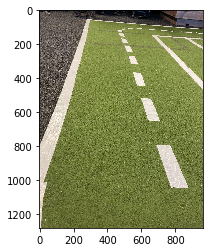

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



img = cv2.imread('road_img.jpg')
#img = cv2.imread('test.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(RGB_im.shape)
plt.imshow(RGB_im)
plt.show()



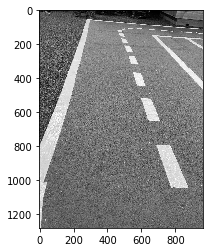

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")
plt.show()

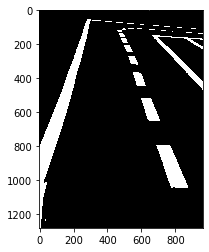

In [13]:
#Thresholding
blur = cv2.blur(gray,(5,5))
_, th_img = cv2.threshold(blur,160,255,cv2.THRESH_BINARY)
plt.imshow(th_img,cmap="gray")
plt.show()

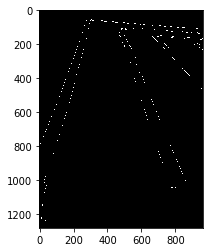

In [14]:
# Edge detection
dst = cv2.Canny(th_img, 180, 255, 30)
plt.imshow(dst,cmap="gray")
plt.show()

In [15]:
cv2.HoughLinesP?

Docstring:
HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines
.   @brief Finds line segments in a binary image using the probabilistic Hough transform.
.   
.   The function implements the probabilistic Hough transform algorithm for line detection, described
.   in @cite Matas00
.   
.   See the line detection example below:
.   @include snippets/imgproc_HoughLinesP.cpp
.   This is a sample picture the function parameters have been tuned for:
.   
.   ![image](pics/building.jpg)
.   
.   And this is the output of the above program in case of the probabilistic Hough transform:
.   
.   ![image](pics/houghp.png)
.   
.   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
.   @param lines Output vector of lines. Each line is represented by a 4-element vector
.   \f$(x_1, y_1, x_2, y_2)\f$ , where \f$(x_1,y_1)\f$ and \f$(x_2, y_2)\f$ are the ending points of each detected
.   line segment.
.   @param rh

In [16]:
lines = cv2.HoughLinesP(dst,rho=1,theta=np.pi/180, threshold =100,minLineLength=50,maxLineGap =5)
print(lines)

[[[ 303   60  498   77]]

 [[  14  771  117  516]]

 [[ 783  281  905  412]]

 [[ 721  213  782  278]]

 [[ 724   92  848  102]]

 [[ 786  834  874 1041]]

 [[ 110  763  186  515]]

 [[ 355   60  443   68]]

 [[ 761  221  954  414]]

 [[ 501   74  600   83]]

 [[ 149  425  185  326]]

 [[ 772  154  847  159]]

 [[ 898  357  957  416]]

 [[ 713  121  782  126]]

 [[ 105  548  129  482]]

 [[ 848  159  959  167]]

 [[ 660  528  702  632]]

 [[ 722   95  801  101]]

 [[ 747  971  771 1039]]

 [[ 891  396  959  468]]

 [[ 499   78  586   84]]

 [[ 716  157  779  161]]

 [[ 597  521  637  645]]

 [[ 248  278  280  156]]

 [[ 186  325  225  214]]

 [[ 125  717  144  656]]

 [[  80  851  111  759]]

 [[ 835  126  889  130]]

 [[ 716  877  760 1010]]

 [[ 693  157  776  237]]

 [[  27 1009   89  827]]

 [[ 186  514  201  455]]

 [[  15 1208   24 1101]]]


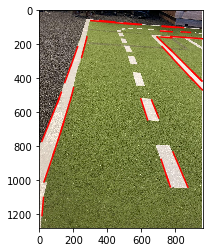

In [17]:
h, w,c = img.shape
plt.imshow(RGB_im)
for i in range(len(lines)):
    
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]    
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]  
    
    xs = [x1,x2]
    ys = [y1,y2]
    plt.plot(xs,ys, 'r-')
plt.xlim(0, w)
plt.ylim(h, 0)
plt.savefig("lines2.png")
plt.show()

In [18]:
cv2.HoughLines?

Docstring:
HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]) -> lines
.   @brief Finds lines in a binary image using the standard Hough transform.
.   
.   The function implements the standard or standard multi-scale Hough transform algorithm for line
.   detection. See <http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm> for a good explanation of Hough
.   transform.
.   
.   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
.   @param lines Output vector of lines. Each line is represented by a 2 or 3 element vector
.   \f$(\rho, \theta)\f$ or \f$(\rho, \theta, \textrm{votes})\f$ . \f$\rho\f$ is the distance from the coordinate origin \f$(0,0)\f$ (top-left corner of
.   the image). \f$\theta\f$ is the line rotation angle in radians (
.   \f$0 \sim \textrm{vertical line}, \pi/2 \sim \textrm{horizontal line}\f$ ).
.   \f$\textrm{votes}\f$ is the value of accumulator.
.   @param rho Distance resolutio

In [19]:
lines = cv2.HoughLines(dst,1,np.pi/180, 150,20,0)
print(lines)

[[[ 3.3000000e+01  1.6580628e+00]]

 [[ 4.2000000e+01  1.6406095e+00]]

 [[-3.8100000e+02  2.3911011e+00]]

 [[ 3.0200000e+02  3.8397244e-01]]

 [[ 2.8000000e+01  1.6580628e+00]]

 [[-3.9800000e+02  2.7401669e+00]]

 [[ 2.8500000e+02  3.4906584e-01]]

 [[ 3.2900000e+02  2.9670596e-01]]

 [[-3.8200000e+02  2.3561945e+00]]

 [[ 3.4000000e+02  3.1415927e-01]]

 [[ 3.1100000e+02  2.6179940e-01]]

 [[-3.6900000e+02  2.3387411e+00]]]


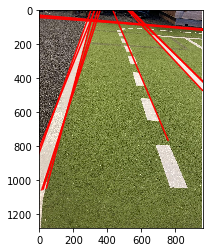

In [20]:
h, w,c = img.shape
plt.imshow(RGB_im)
for i in range(len(lines)):
    
    rho, theta = lines[i][0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho; y0 = b*rho
    
    xs = [int(x0 + 1000*(-b)), int(x0 - 1000*(-b))]
    ys = [int(y0 + 1000*(a)), int(y0 - 1000*(a))]
    plt.plot(xs,ys, 'r-')
plt.xlim(0, w)
plt.ylim(h, 0)
plt.savefig("lines.png")
plt.show()